In [1]:
from __future__ import division
%matplotlib nbagg
import pandas as pd
import os, sys
import numpy as np
from collections import defaultdict
#from caseDetection import detect_case
#from world_map_maker import create_world_map
import matplotlib
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 14}
matplotlib.rc('font', **font)
import matplotlib.pyplot as plt
import subprocess
import urllib
#%load_ext autoreload
#%autoreload 2
#import matplotlib as mpl
#mpl.use("GTK3cairo")
#import matplotlib.pyplot as plt
#plt.plot([1,2,3,4],'*-')

## Validate the data
- based on Vern's suggestion
- Ben's biased data first, then Roya's unbiased


In [2]:
SAMPLENAME = "validated_20150422"
#SAMPLENAME = "validate_20150422"
DATAPATH = "data/"
RESULTS = "results/" + SAMPLENAME + "/"
if not os.path.exists(RESULTS):
    os.makedirs(RESULTS)

In [3]:
df_all = pd.read_pickle(DATAPATH + "case_detected_all_20150412.pkl").reset_index()
df_all2 = pd.read_pickle(DATAPATH + "case_detected_all_20150422.pkl").reset_index()
df_all.head(1)

,index,ipids,ts,diff_list,retransmit_times,gIP,sIP,port,k1,k2,country,first_ts,diff_p1,diff_p2,domain,subcat,case,intervention,pvalue
0,138000,"[21295, 21297, 21302, 21312, 21326, 21327, 213...","[60, 65, 70]","[3, 1, 4, 9, 13, 0, 2, 26, 19, 19, 2, 2, 1, 1,...","[0, 5, 10]",61.236.159.57,171.67.215.200,80,10,40,CN,60,55,60,stanford.edu,regional|reference,2,19.507273,1.025564e-29


In [117]:
# servers IMC and bad sIPs

df_digs = pd.read_html(RESULTS + 'updated_sIP_domain_to_check.html')[0]
df_sIP_subcat = pd.read_csv("data/Servers_IMC.txt")

# unique sIP, gIP measurements

In [143]:
count_per_case = df_all[df_all['case'].isin([1,2,3])].groupby(["sIP", "gIP", "country", "case"])['port'].count().unstack()
count_per_case['tot'] = count_per_case.sum(axis=1)
df_tots = count_per_case[count_per_case['tot']> 1].fillna(0)
case12 = df_tots[(df_tots[1]>0) & (df_tots[2]>0)]
case23 = df_tots[(df_tots[2]>0) & (df_tots[3]>0)]
case13 = df_tots[(df_tots[1]>0) & (df_tots[3]>0)]
case123 = df_tots[(df_tots[1]>0) & (df_tots[2]>0) & (df_tots[3]>0)]

In [144]:
df_case12 = case12.reset_index().merge( df_all, on=['sIP','gIP'] )
df_case23 = case23.reset_index().merge( df_all, on=['sIP','gIP'] )
df_case13 = case13.reset_index().merge( df_all, on=['sIP','gIP'] )
df_case123 = case123.reset_index().merge( df_all, on=['sIP','gIP'] )

df_confused_cases1 = pd.concat([df_case12, df_case23, df_case13, df_case123])

In [145]:
stats = defaultdict(list)

stats['Apr12'].append(len(df_all))
stats['Apr12'].append(len(df_all[df_all['case'].isin([1,2,3])]))
stats['Apr12'].append(len(df_all[df_all['case'].isin([0,4])]))
stats['Apr12'].append(len(count_per_case))
stats['Apr12'].append(len(df_tots))
stats['Apr12'].append(len(case12))
stats['Apr12'].append(len(case23))
stats['Apr12'].append(len(case13))
stats['Apr12'].append(len(case123))
stats['Apr12'].append(len(df_confused_cases1))

In [146]:
print "Total unique sIP, gIP measurements only case 1,2,3: ", len(count_per_case)
print "Total sIP, gIP valid pairs with at least 2 measurements: ", len(df_tots)

print "Both case 1 and 2: ", len(case12)
print "Both case 2 and 3: ",len(case23)
print "Both case 1 and 3: ",len(case13)

Total unique sIP, gIP measurements only case 1,2,3:  192592
Total sIP, gIP valid pairs with at least 2 measurements:  8571
Both case 1 and 2:  109
Both case 2 and 3:  428
Both case 1 and 3:  27


In [4]:
count_per_case = df_all2[df_all2['case'].isin([1,2,3])].groupby(["sIP", "gIP", "country", "case"])['port'].count().unstack()
count_per_case['tot'] = count_per_case.sum(axis=1)
df_tots = count_per_case[count_per_case['tot']> 1].fillna(0)
case12 = df_tots[(df_tots[1]>0) & (df_tots[2]>0)]
case23 = df_tots[(df_tots[2]>0) & (df_tots[3]>0)]
case13 = df_tots[(df_tots[1]>0) & (df_tots[3]>0)]
case123 = df_tots[(df_tots[1]>0) & (df_tots[2]>0) & (df_tots[3]>0)]

In [5]:
df_case12 = case12.reset_index().merge( df_all2, on=['sIP','gIP'] )
df_case23 = case23.reset_index().merge( df_all2, on=['sIP','gIP'] )
df_case13 = case13.reset_index().merge( df_all2, on=['sIP','gIP'] )
df_case123 = case123.reset_index().merge( df_all2, on=['sIP','gIP'] )

df_confused_cases = pd.concat([df_case12, df_case23, df_case13, df_case123])
df_confused_cases.to_csv(RESULTS + 'unique_sIP_gIP_multiple_case_detected.csv')
df_confused_cases.to_pickle(RESULTS + 'unique_sIP_gIP_multiple_case_detected.pkl')

In [44]:
df = df_all2[ df_all2['case'].isin([1,2,3]) ]
remove = {'sIP': list(df_confused_cases['sIP']), 'gIP': list(df_confused_cases['gIP'])}
df_rem = df[['sIP', 'gIP']].isin( remove )
df_discard = df[ df_rem['sIP'] & df_rem['gIP'] ]
df_keep = df[ ~df_rem['sIP'] | ~df_rem['gIP']  ]
df_discard

,index,ipids,ts,diff_list,retransmit_times,gIP,sIP,port,k1,k2,country,first_ts,diff_p1,diff_p2,domain,subcat,case,intervention,pvalue
1200,142347,"[25261, 25262, 25263, 25264, 25265, 25267, 252...","[60, 62, 64, 68, 76, 92]","[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 2, 4, 8, 16, 32]",217.174.235.12,23.212.53.182,80,10,40,TM,60,60,58,mlb.mlb.com,sports,2,19.895238,2.002312e-97
1204,142351,"[50919, 50920, 50921, 50922, 50923, 50924, 509...","[60, 62, 64, 68, 76, 92]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 2, 4, 8, 16, 32]",69.63.70.142,23.212.53.182,80,10,40,SZ,60,60,60,mlb.mlb.com,sports,2,19.983333,3.198919e-175
1205,142352,"[18834, 18835, 18836, 18837, 18838, 18839, 188...","[60, 62, 64, 68, 76, 92]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 2, 4, 8, 16, 32]",213.178.243.19,23.212.53.182,80,10,40,SY,60,60,60,mlb.mlb.com,sports,2,20.038095,3.821694e-173
1207,142354,"[42973, 42974, 42975, 42976, 42978, 42983, 429...","[60, 62, 64, 68, 76, 92]","[2, 0, 0, 0, 1, 4, 1, 0, 2, 1, 0, 0, 0, 0, 0, ...","[0, 2, 4, 8, 16, 32]",41.78.72.1,23.212.53.182,80,10,40,SO,60,60,60,mlb.mlb.com,sports,2,20.216667,3.600305e-88
1209,142356,"[49255, 49257, 49258, 49259, 49261, 49262, 492...","[60, 62, 64, 68, 76, 92]","[0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 2, 5, 2, 2, 1, ...","[0, 2, 4, 8, 16, 32]",41.205.234.178,23.212.53.182,80,10,40,SL,60,57,59,mlb.mlb.com,sports,2,19.916622,5.125540e-115
1213,142361,"[44677, 44679, 44680, 44681, 44684, 44687, 446...","[60, 62, 64, 68, 76, 92]","[2, 1, 0, 0, 2, 2, 2, 4, 5, 2, 2, 1, 2, 1, 0, ...","[0, 2, 4, 8, 16, 32]",196.29.176.69,23.212.53.182,80,10,40,SD,60,60,60,mlb.mlb.com,sports,2,20.625654,7.379262e-69
1220,142368,"[17560, 17571, 17583, 17594, 17605, 17616, 176...","[60, 62, 64, 68, 76, 92]","[12, 10, 11, 10, 10, 10, 10, 13, 11, 13, 11, 1...","[0, 2, 4, 8, 16, 32]",200.10.228.130,23.212.53.182,80,10,40,PY,60,60,60,mlb.mlb.com,sports,2,20.035714,6.899975e-76
1245,142395,"[53929, 53931, 53934, 53936, 53938, 53940, 539...","[60, 62, 64, 68, 76, 92]","[2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, ...","[0, 2, 4, 8, 16, 32]",41.78.168.49,23.212.53.182,80,10,40,TZ,60,60,60,mlb.mlb.com,sports,2,19.500247,7.348790e-80
1250,142400,"[4288, 4289, 4290, 4291, 4292, 4293, 4294, 429...","[60, 62, 64, 68, 76, 92]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 2, 4, 8, 16, 32]",217.174.235.14,23.212.53.182,80,10,40,TM,60,60,38,mlb.mlb.com,sports,2,18.166667,3.572891e-72
1254,142404,"[12688, 12691, 12696, 12699, 12702, 12704, 127...","[60, 62, 64, 68, 76, 92]","[3, 2, 4, 2, 2, 1, 1, 5, 1, 3, 3, 3, 5, 4, 3, ...","[0, 2, 4, 8, 16, 32]",69.63.64.69,23.212.53.182,80,10,40,SZ,60,60,60,mlb.mlb.com,sports,2,19.439706,2.535762e-51


In [46]:
# quick check of discarded data
df_discard.groupby(['sIP', 'gIP', 'case'])['country'].count().unstack().fillna(0)

6117

In [149]:
stats['field'].append('Total measurements')
stats['Apr22'].append(len(df_all2))
stats['field'].append('Total measurements case 1,2,3')
stats['Apr22'].append(len(df_all2[df_all2['case'].isin([1,2,3])]))
stats['field'].append('Total measurements case 0,4')
stats['Apr22'].append(len(df_all2[df_all2['case'].isin([0,4])]))
stats['field'].append('Total unique sIP, gIP measurements only case 1,2,3')
stats['Apr22'].append(len(count_per_case))
stats['field'].append('Total sIP, gIP valid pairs with at least 2 measurements')
stats['Apr22'].append(len(df_tots))
stats['field'].append('Both case 1 and 2')
stats['Apr22'].append(len(case12))
stats['field'].append('Both case 2 and 3')
stats['Apr22'].append(len(case23))
stats['field'].append('Both case 1 and 3')
stats['Apr22'].append(len(case13))
stats['field'].append('All case 1, 2, 3')
stats['Apr22'].append(len(case123))
stats['field'].append('Total confusing cases')
stats['Apr22'].append(len(df_confused_cases))

df_stats = pd.DataFrame(stats)[['field', 'Apr12', 'Apr22']]

In [151]:
len(df_confused_cases)

681

In [152]:
df_stats.to_html(RESULTS + 'measurements_stats.htm')
df_stats

,field,Apr12,Apr22
0,Total measurements,235695,200048
1,"Total measurements case 1,2,3",201759,180415
2,"Total measurements case 0,4",33936,19633
3,"Total unique sIP, gIP measurements only case 1...",192592,163725
4,"Total sIP, gIP valid pairs with at least 2 mea...",8571,13412
5,Both case 1 and 2,109,193
6,Both case 2 and 3,428,86
7,Both case 1 and 3,27,9
8,"All case 1, 2, 3",4,0
9,Total confusing cases,1299,681


# Concat all data

In [47]:
# concatenate all data
df_full = pd.concat([df_all, df_all2])

# unique sIP
- disregard sIPs that had only case 2

In [176]:
count_per_case = df_all2[df_all2['case'].isin([1,2,3])].groupby(["sIP", "case"])['port'].count().unstack().fillna(0)
count_per_case['tot'] = count_per_case.sum(axis=1)
websites = count_per_case.join(df_sIP_subcat.set_index('sIP'))
no_case2 = websites[websites[2]==0]
no_case2.to_html(RESULTS + 'sIP_domain_no_case2_detected.html')
no_case2.head()

,1,2,3,tot,domain,subcat
sIP,,,,,,
104.16.7.118,2,0,378,380,petmd.com,health
104.20.28.30,4,0,370,374,bungie.net,kids_and_teens|games
104.20.5.196,6,0,387,393,furaffinity.net,adult
104.28.7.85,3,0,381,384,indiansexstories.net,adult
107.20.154.40,159,0,1,160,strava.com,sports


## 99% all case 2

In [193]:
websites [( websites[2] >= 0.99 * websites['tot'] )]

,1,2,3,tot,domain,subcat
sIP,,,,,,
166.78.40.244,1,381,2,384,pcgamer.com,games
174.123.175.139,0,396,4,400,debonairblog.com,adult
199.66.166.210,1,397,3,401,mercola.com,health


In [264]:
websites['censor'] = websites[2]/websites['tot']

In [285]:
minecraft = '23.23.208.240'
temp = df[df['sIP']==minecraft].groupby(['case', 'country'])['index'].count().unstack().T.fillna(0).join(country.set_index('country'))
temp['tot'] = temp.sum(axis=1)
temp['cens'] = temp[1]+temp[3]
temp.sort('cens', ascending=False)[['name', 1,2,3,'cens', 'tot']]

,name,1,2,3,cens,tot
country,,,,,,
HU,Hungary,4,0,0,4,4
JO,Jordan,4,0,0,4,4
IE,Ireland,4,0,0,4,4
ID,Indonesia,4,0,0,4,4
JM,Jamaica,4,0,0,4,4
MN,Mongolia,3,0,0,3,3
MR,Mauritania,3,0,0,3,3
MU,Mauritius,3,0,0,3,3
MW,Malawi,3,0,0,3,3


In [ ]:
xdata = list( websites.sort('censor', ascending=True )['censor'] * 100)
ydata = [x/len(xdata) for x in range(len(xdata))]

fig1, ax1 = plt.subplots(1,1, figsize=(7,7))
ax1.plot(xdata, ydata)
ax1.grid(1)
ax1.set_xlabel("sIP censorship \%")
fig1.show()

In [19]:
### Finding ground Truth. sips that are blocked in US are cut out.


In [78]:
df_sIP_subcat = pd.read_csv("data/Servers_IMC.txt")
df_us=df_all[df_all['country'].isin(['US'])]
count_per_case_us = df_us[df_us['case'].isin([1,2,3])].groupby(["sIP", "case"])['port'].count().unstack().fillna(0)
count_per_case_us['tot'] = count_per_case_us.sum(axis=1)
count_per_case_us

count_per_case_us['case2']= count_per_case_us[2]/count_per_case_us['tot']
count_per_case_us_invalid = count_per_case_us[( count_per_case_us['case2'] < 0.2 ) & (count_per_case_us['tot'] > 50 ) ]

#count_per_case_us_invalid
#count_per_case_us_valid = count_per_case_us[ (count_per_case_us['tot']> 50) & (count_per_case_us['case2']>0.95) ]
#websites_us = count_per_case_us.join(df_sIP_subcat.set_index('sIP'))
#websites_us[websites_us[]]
check = count_per_case_us_invalid.join(bad_sIPs.set_index('sIP')).fillna(0)
check

,1,2,3,tot,case2,domain
sIP,,,,,,
104.16.5.13,0,1,89,90,0.011111,0
104.16.7.118,1,0,95,96,0.000000,0
104.20.12.28,1,0,100,101,0.000000,0
104.20.28.30,0,1,88,89,0.011236,0
104.20.28.34,0,0,87,87,0.000000,0
104.20.5.196,0,0,64,64,0.000000,0
104.28.7.85,0,0,86,86,0.000000,0
107.20.154.40,47,8,4,59,0.135593,strava.com
107.20.157.190,75,3,1,79,0.037975,suicidegirls.com


### Control group

In [253]:
temp = df[df['domain']=='torDir']
temp2 = temp.groupby(['sIP', 'country', 'case'])['index'].count().unstack().fillna(0)
temp2['total_measurements'] = temp2.sum(axis=1)
temp2['censorship'] = temp2[1]+temp2[3]
temp2['noise'] = temp2[0]+temp2[4]
temp2 = temp2.rename(columns={1:'server-to-client', 3:'client-to-server'})
temp3 = temp2[temp2['censorship']>0].reset_index().merge(country).sort('censorship', ascending=False).reset_index()

temp4 = temp3[['sIP', 'country', 'name', 'server-to-client', 'client-to-server', 'total_measurements', 'noise']]
temp4.to_html(RESULTS + 'torDir_reachability_censored.html')
temp4.head(10)

,sIP,country,name,server-to-client,client-to-server,total_measurements,noise
0,193.23.244.244,PG,Papua New Guinea,3,0,3,0
1,194.109.206.212,SA,Saudi Arabia,0,3,3,0
2,193.23.244.244,CN,China,3,0,3,0
3,194.109.206.212,CN,China,3,0,3,0
4,199.254.238.52,CN,China,3,0,3,0
5,194.109.206.212,IR,"Iran, Islamic Republic of",0,3,3,0
6,131.188.40.189,CN,China,3,0,3,0
7,193.23.244.244,IR,"Iran, Islamic Republic of",0,2,3,1
8,193.23.244.244,HN,Honduras,2,0,3,0
9,193.23.244.244,SG,Singapore,2,0,3,1


In [224]:
websites[websites['subcat']=='circum']

,1,2,3,tot,domain,subcat,censor
sIP,,,,,,,
1.209.122.23,0,377,8,385,riseup.net,circum,0.979221
104.193.9.122,2,321,8,331,pipeline.infra.ooni.nu,circum,0.969789
107.170.93.98,1,361,8,370,cupcakebridge.com,circum,0.975676
131.188.40.189,7,328,4,339,torDir,circum,0.967552
173.236.226.119,3,412,3,418,bravenewsoftware.org,circum,0.985646
192.249.116.218,3,366,6,375,alkasir.com,circum,0.976000
193.23.244.244,35,307,8,350,torDir,circum,0.877143
194.109.206.212,6,336,11,353,torDir,circum,0.951841
194.150.168.119,2,369,4,375,globaleaks.org,circum,0.984000


,domain,error,resolved,sIP,isCDN
5,navbharattimes.indiatimes.com,1,"[www.indiatimes.com.edgesuite.net., a1934.g.ak...",23.212.53.230,1
12,yellowpages.sulekha.com,0,"[ypdb.sulekha.com., 161.58.179.241]",161.58.179.241,1
18,www.linkedin.com,0,"[any-na.www.linkedin.com., 108.174.10.10]",108.174.10.10,1
49,play.google.com,1,"[play.l.google.com., 173.194.219.101, 173.194....",74.125.28.139,1
54,www.youtube.com,1,"[youtube-ui.l.google.com., 64.233.177.91, 64.2...",74.125.28.136,1
80,espn.go.com,0,"[espn.gns.go.com., 68.71.212.186]",68.71.212.186,1
104,translate.google.com,1,"[www3.l.google.com., 173.194.219.138, 173.194....",74.125.28.102,1
115,www.kaiserpermanente.org,1,"[kaiserpermanente.org.edgekey.net., e3072.b.ak...",172.233.29.95,1
130,money.cnn.com,0,"[cnnfn.com., 157.166.226.108, 157.166.226.109,...",157.166.248.108,1
133,www.mint.com,1,"[www.mint.com.edgekey.net., e4838.b.akamaiedge...",23.3.87.153,1


207.242.93.24 timed out final
162.79.29.12 [Errno 104] Connection reset by peer final
107.20.154.40 <urlopen error [Errno 111] Connection refused> final
196.35.152.185 200 loop:  0 203.176.113.78 [Errno 104] Connection reset by peer final
54.163.241.169 <urlopen error timed out> final
121.241.247.61 200 loop:  1 54.85.98.80 <urlopen error timed out> final
199.227.51.26 timed out final
109.201.133.195 <urlopen error [Errno 113] No route to host> final
199.181.132.250 200 loop:  0 212.58.244.20 '' final
129.35.201.80 <urlopen error [Errno -2] Name or service not known> final
208.253.22.120 200 loop:  0 

# Group by sIP, domain, country, case

In [213]:
df_case2 = websites [( websites[2] >= 0.99 * websites['tot'] )].reset_index().merge(df_all2, on=['sIP'])
df_case2.groupby(['sIP', 'domain_x', 'country', 'case'])['first_ts'].count().unstack().fillna(0)

case                                0  1  2  3  4
sIP            domain_x    country               
166.78.40.244  pcgamer.com AE       0  0  3  0  0
                           AF       0  1  2  0  0
                           AL       1  0  1  0  0
                           AM       0  0  2  0  0
                           AO       1  0  2  0  0
                           AR       0  0  3  0  0
                           AT       0  0  3  0  0
                           AU       0  0  2  0  0
                           AZ       0  0  2  0  1
                           BA       0  0  3  0  0
                           BD       0  0  3  0  0
                           BE       0  0  3  0  0
                           BF       0  0  3  0  0
                           BG       0  0  3  0  0
                           BH       0  0  3  0  0
                           BI       0  0  3  0  0
                           BJ       0  0  3  0  0
                           BO       0  0  3  0  0
                           BR       0  0  3  0  0
                           BW       0  0  3  0  0
                           BY       0  0  2  0  0
                           CA       0  0  3  0  0
                           CD       0  0  3  0  0
                           CG       0  0  3  0  0
                           CH       0  0  2  0  1
                           CI       1  0  2  0  0
                           CL       0  0  3  0  0
                           CM       0  0  3  0  0
                           CN       0  0  1  0  1
                           CO       0  0  2  0  0
...                                .. .. .. .. ..
199.66.166.210 mercola.com SA       0  0  2  0  0
                           SD       0  0  3  0  0
                           SE       0  0  3  0  0
                           SG       1  0  1  0  1
                           SI       0  0  3  0  0
                           SK       0  0  3  0  0
                           SL       0  0  3  0  0
                           SN       0  0  3  0  0
                           SO       0  0  3  0  0
                           SV       0  0  3  0  0
                           SY       0  0  3  0  0
                           SZ       0  0  2  0  0
                           TG       0  0  3  0  0
                           TH       0  0  2  0  0
                           TL       0  0  2  0  0
                           TM       0  0  3  0  0
                           TN       0  0  3  0  0
                           TR       0  0  3  0  0
                           TT       0  0  3  0  0
                           TZ       0  0  3  0  0
                           UA       0  0  3  0  0
                           UG       0  0  3  0  0
                           US       1  0  1  0  1
                           UY       0  0  3  0  0
                           UZ       1  0  2  0  0
                           VE       1  0  2  0  0
                           VN       1  0  2  0  0
                           ZA       0  0  3  0  0
                           ZM       0  0  3  0  0
                           ZW       0  0  3  0  0

[438 rows x 5 columns]

In [212]:
country.merge( df_all2[ ( df_all2['domain']=='riseup.net' ) & ( df_all2['case']==3 ) ], on='country' )

,country,name,index,ipids,ts,diff_list,retransmit_times,gIP,sIP,port,k1,k2,first_ts,diff_p1,diff_p2,domain,subcat,case,intervention,pvalue
0,AF,Afghanistan,11480,"[33686, 33687, 33689, 33690, 33691, 33692, 336...","[60, 62, 64, 68, 76, 92]","[0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 4, 0, 0, ...","[0, 2, 4, 8, 16, 32]",180.94.76.34,1.209.122.23,80,10,40,60,60,60,riseup.net,circum,3,70.157143,1
1,BF,Burkina Faso,11380,"[5417, 5428, 5437, 5458, 5473, 5488, 5502, 551...","[60, 62, 64, 68, 76, 92]","[14, 10, 8, 20, 14, 14, 13, 13, 12, 10, 10, 15...","[0, 2, 4, 8, 16, 32]",196.28.246.97,1.209.122.23,80,10,40,60,60,60,riseup.net,circum,3,81.449804,1
2,GH,Ghana,11354,"[8363, 8365, 8366, 8367, 8368, 8369, 8370, 837...","[60, 62, 64, 68, 76, 92]","[0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, ...","[0, 2, 4, 8, 16, 32]",80.87.83.54,1.209.122.23,80,10,40,60,60,60,riseup.net,circum,3,71.146154,1
3,GH,Ghana,11399,"[49251, 49254, 49258, 49266, 49279, 49288, 493...","[60, 62, 64, 68, 76, 92]","[3, 2, 3, 7, 12, 8, 23, 12, 13, 7, 10, 9, 12, ...","[0, 2, 4, 8, 16, 32]",41.78.40.254,1.209.122.23,80,10,40,60,60,59,riseup.net,circum,3,67.977778,1
4,IR,"Iran, Islamic Republic of",11525,"[18400, 18410, 18421, 18426, 18430, 18442, 184...","[60, 62, 64, 68, 76, 92]","[4, 9, 10, 4, 3, 11, 10, 4, 7, 3, 8, 7, 3, 25,...","[0, 2, 4, 8, 16, 32]",217.218.190.22,1.209.122.23,80,10,40,60,60,60,riseup.net,circum,3,72.167989,1
5,MD,"Moldova, Republic of",11555,"[52254, 52274, 52296, 52317, 52337, 52358, 523...","[60, 62, 64, 68, 76, 92]","[20, 19, 21, 20, 19, 20, 23, 22, 21, 26, 24, 2...","[0, 2, 4, 8, 16, 32]",195.22.224.254,1.209.122.23,80,10,40,60,60,60,riseup.net,circum,3,59.954762,1
6,MR,Mauritania,11502,"[23276, 23277, 23278, 23280, 23281, 23282, 232...","[60, 62, 64, 68, 76, 92]","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[0, 2, 4, 8, 16, 32]",82.151.84.62,1.209.122.23,80,10,40,60,60,60,riseup.net,circum,3,70.460827,1
7,MR,Mauritania,11549,"[16489, 16490, 16491, 16492, 16493, 16494, 164...","[60, 62, 64, 68, 76, 92]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 2, 4, 8, 16, 32]",82.151.84.62,1.209.122.23,80,10,40,60,58,60,riseup.net,circum,3,70.341133,1


In [195]:
websites[websites['domain']=='riseup.net']

,1,2,3,tot,domain,subcat
sIP,,,,,,
1.209.122.23,0,377,8,385,riseup.net,circum


# unique sIP, country

In [122]:
count_per_case = df_full[df_full['case'].isin([1,2,3])].groupby(["domain", "country", "case"])['port'].count().unstack().fillna(0)
count_per_case['tot'] = count_per_case.sum(axis=1)
count_per_case['case1'] = count_per_case[1]/count_per_case['tot']
count_per_case['case2'] = count_per_case[2]/count_per_case['tot']
count_per_case['case3'] = count_per_case[3]/count_per_case['tot']

# all cases
df_sIP_vector = count_per_case[['case1','case2','case3']].unstack().fillna(0)

# only case 2
df_sIP_vector = count_per_case['case2'].unstack().fillna(0)

In [82]:
#from scipy.sparse.linalg import svds
from numpy.linalg import svd
import scipy.stats as stats
import math

sites = df_sIP_vector.index
countries = df_sIP_vector.columns
mat = df_sIP_vector.T.as_matrix()
#np.rank(mat)
df_sIP_vector.T.head()

domain,24hourfitness.com,6pm.com,9gag.com,aa.com,aarp.org,abc.net.au,abcnews.go.com,accuweather.com,acs.org,adam4adam.com,...,yellowpages.sulekha.com,yelp.com,youporn.com,youtube.com,zappos.com,zara.com,zh.greatfire.org,zillow.com,zocdoc.com,zomato.com
country,,,,,,,,,,,,,,,,,,,,,
AE,1.000000,1.0,1,0.666667,0.000000,0.5,1,0.000000,1,1.000000,...,1.000000,1,0.500000,1,1,0,0.5,1.000000,0,0.333333
AF,1.000000,1.0,1,0.666667,0.000000,1.0,1,0.666667,1,0.666667,...,1.000000,1,0.666667,1,1,1,1.0,1.000000,0,0.333333
AL,0.333333,0.5,0,0.000000,0.333333,1.0,1,0.000000,0,1.000000,...,0.666667,1,1.000000,1,1,1,1.0,0.000000,0,0.333333
AM,0.000000,1.0,1,0.666667,0.000000,1.0,1,1.000000,1,1.000000,...,1.000000,1,1.000000,1,1,0,0.0,1.000000,0,0.333333
AO,1.000000,1.0,1,0.666667,0.000000,1.0,1,1.000000,1,1.000000,...,1.000000,1,0.500000,1,1,1,1.0,0.666667,0,0.333333


In [83]:
def center(a, scale=True, axis=0):
    """Center the matrix so that units don't matter by subtracting the mean and
    dividing by the standard deviation
    
    Again, this won't tell us the most commonly censored sites, this will tell us
    which sites are commonly censored together
    
    """
    b = np.array(a, copy=True)
    mean = a.mean(axis=axis)
    b -= mean
    if scale:
        std = b.std(axis=axis)
        std = np.where( std, std, 1. )
        b /= std
    return b

center_obj = center(mat)
U, s, Vt = svd(center_obj)
V = Vt.T

In [84]:
# print some info about the top few principal components
print "Variance explained, mean, std dev of vector"
for index in range(10):
    var_exp = s[index] * s[index] / float(len(countries))
    mean = stats.tmean(V[:, index])
    var = stats.tvar(V[:, index])
    # compute how many elements are really present in the vector
    stuff = [1 for x in V[:, index] if math.fabs(x) > 0.05]
    
    # print it all out
    print "{:< .5e}, {:< .5e}, {:< .5e}, {}".format(var_exp, mean, var, len(stuff))

Variance explained, mean, std dev of vector
 1.34675e+02,  3.76021e-02,  4.49119e-04, 196
 2.71423e+01, -1.99979e-03,  1.86167e-03, 149
 2.37280e+01, -1.14846e-02,  1.73353e-03, 71
 1.39747e+01, -3.17761e-03,  1.85556e-03, 102
 1.22394e+01, -3.02908e-03,  1.85648e-03, 139
 1.19152e+01, -1.58003e-03,  1.86317e-03, 112
 1.03356e+01,  1.41298e-03,  1.86367e-03, 129
 9.83436e+00,  1.45170e-03,  1.86356e-03, 131
 9.33451e+00, -4.11982e-04,  1.86550e-03, 127
 8.43480e+00, -2.60673e-03,  1.85886e-03, 124


In [85]:
dom2cat, cat2dom = {}, {}
with open('data/Servers_IMC.txt', 'r') as filep:
    for line in filep.readlines():
        ip, domain, cats = line.strip().split(',')
        cats = cats.split('|')
        dom2cat[domain] = cats
        for cat in cats:
            if cat not in cat2dom:
                cat2dom[cat] = {}
            cat2dom[cat][domain] = True

In [87]:
import collections
import pprint
# let's explore the individual components in more depth by printing the top 9 components (don't care about first component)
for index in range(0, 10):
    mean = stats.tmean(V[:, index])
    indices = [x for x in range(len(V[:, index])) if math.fabs(V[x, index]) > 0.05]
    #print indices
    site_list = [sites[x] for x in indices]
    counter = collections.Counter()
    for site in site_list:
        cats = dom2cat[site]
        for cat in cats:
            counter[cat] += 1
    print "Component " + str(index) + ": " +", ".join(site_list) + "\n"
    print sorted(counter.items(), key=lambda x: x[1], reverse=True)
    print
    entries = {}
    for site in site_list:
        cats = dom2cat[site]
        for cat in cats:
            if cat not in entries:
                entries[cat] = []
            entries[cat].append(site)
    #pprint.pprint(entries)

Component 0: 24hourfitness.com, 9gag.com, abc.net.au, accuweather.com, acs.org, adp.com, alexa.com, alkasir.com, allrecipes.com, americanexpress.com, ancestry.com, answers.yahoo.com, apa.org, ar.rian.ru, archive.org, asexstories.com, autotrader.com, aventertainments.com, barnesandnoble.com, battle.net, bedbathandbeyond.com, bettycrocker.com, bhg.com, bodybuilding.com, bom.gov.au, booking.com, cam4.com, cdc.gov, celebritymoviearchive.com, chess.com, columbia.edu, complex.com, consumerreports.org, copyscape.com, cornell.edu, costco.com, cricket.co.za, dict.cc, dict.leo.org, dieburger.com, digitaltrends.com, ea.com, easyjet.com, emedicine.medscape.com, entrepreneur.com, eonline.com, epa.gov, espn.go.com, espnfc.com, f2cf.org, fafsa.ed.gov, familysearch.org, fatakat.com, fatwallet.com, femjoy.com, fetlife.com, fidelity.com, fifa.com, filgoal.com, findagrave.com, fitnessmagazine.com, fixya.com, flickr.com, food.com, foodnetwork.com, football.fantasysports.yahoo.com, freeones.com, gaiaonline

### Pre-processing PCA

In [4]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
tsne = TSNE(n_components=2, random_state=0)
pca = PCA(n_components=2)

In [6]:
# concatenate all data
df_full= df_all2 #= pd.concat([df_all, df_all2])

In [8]:
count_per_case = df_full[df_full['case'].isin([1,2,3])].groupby(["domain", "country", "case"])['port'].count().unstack().fillna(0)
count_per_case['tot'] = count_per_case.sum(axis=1)
count_per_case['case1'] = count_per_case[1]/count_per_case['tot']
count_per_case['case2'] = count_per_case[2]/count_per_case['tot']
count_per_case['case3'] = count_per_case[3]/count_per_case['tot']

# all cases
df_sIP_vector = count_per_case[['case1','case2','case3']].unstack().fillna(0)

# only case 2
df_sIP_vector = count_per_case['case2'].unstack().fillna(0)

df_sIP_vector.head()

country,AE,AF,AL,AM,AO,AR,AT,AU,AZ,BA,...,UA,UG,US,UY,UZ,VE,VN,ZA,ZM,ZW
domain,,,,,,,,,,,,,,,,,,,,,
24hourfitness.com,1.000000,1.000000,0.333333,0.000000,1.000000,1.000000,1.00,1.000000,1.000000,1.00,...,1.000000,1.0,0,1,1,1,1,0.666667,1,1
6pm.com,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000,1.00,0.666667,1.000000,1.00,...,1.000000,1.0,1,1,1,1,1,1.000000,1,1
9gag.com,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.00,1.000000,1.000000,1.00,...,1.000000,1.0,1,1,1,1,1,1.000000,1,1
aa.com,0.666667,0.666667,0.000000,0.666667,0.666667,0.666667,0.75,1.000000,0.666667,0.75,...,0.666667,1.0,1,1,1,1,1,1.000000,1,1
aarp.org,0.000000,0.000000,0.333333,0.000000,0.000000,0.500000,0.00,0.000000,0.000000,0.00,...,0.333333,0.5,0,0,0,0,0,0.000000,0,0


<IPython.core.display.Javascript object>


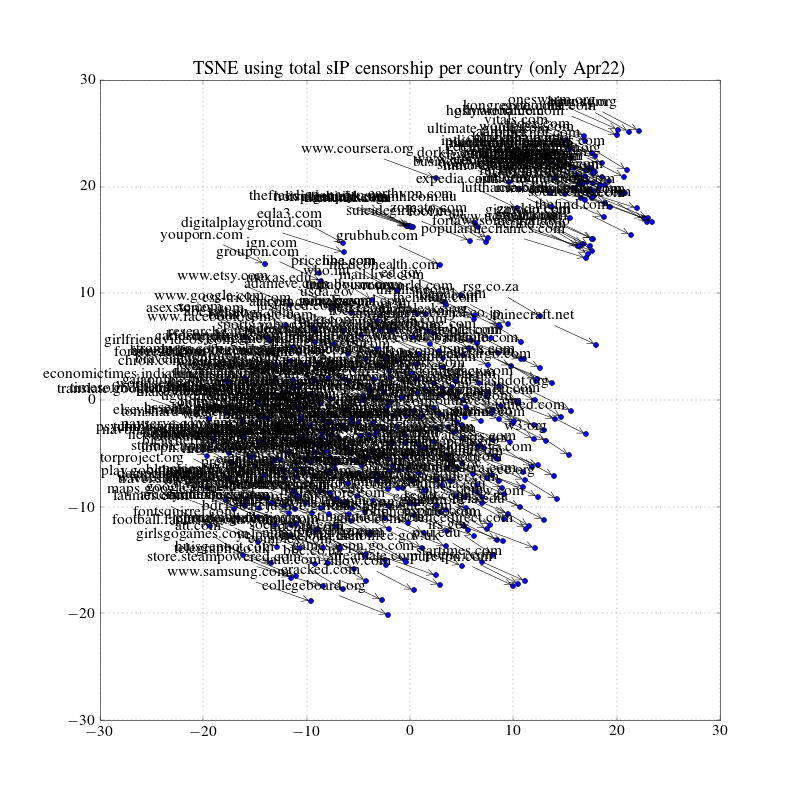

In [11]:
df4 = pd.DataFrame(tsne.fit_transform(df_sIP_vector.as_matrix())).set_index(df_sIP_vector.index)
fig2, ax2 = plt.subplots(1,1, figsize=(10,10))
ax2.scatter(df4[0], df4[1])
for label, x, y in zip(df4.index, df4[0], df4[1]):
    ax2.annotate(
        label, 
        xy = (x, y), xytext = (-20, 20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        #bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
ax2.grid(1)
ax2.set_title("TSNE using total sIP censorship per country (only Apr22)")
fig2.savefig(RESULTS + "tsne_sIPs_countries_case2")
fig2.show()

<IPython.core.display.Javascript object>


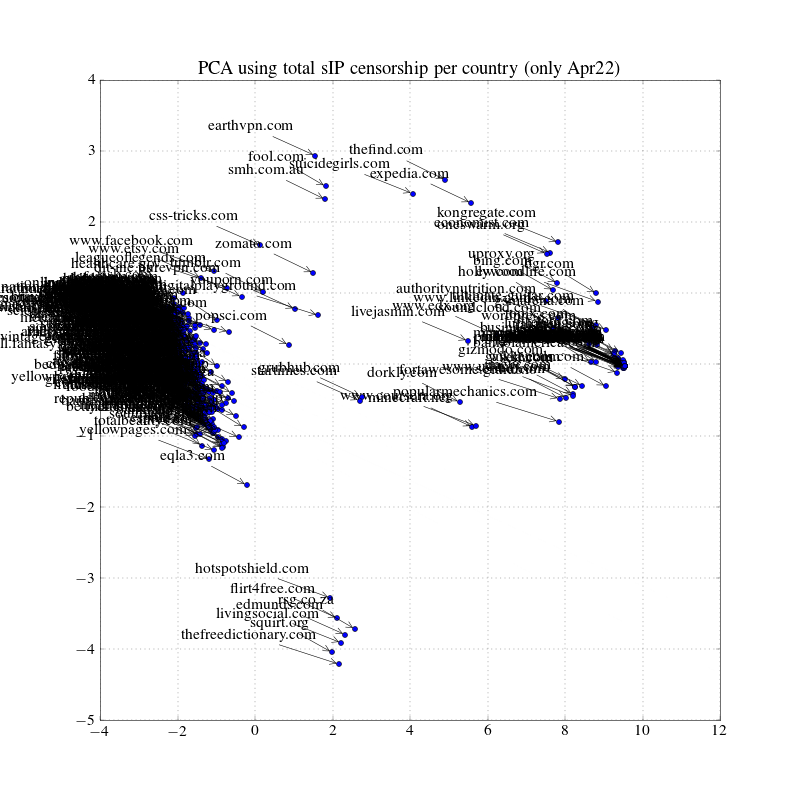

In [12]:
df4 = pd.DataFrame(pca.fit_transform(df_sIP_vector.as_matrix())).set_index(df_sIP_vector.index)
fig2, ax2 = plt.subplots(1,1, figsize=(10,10))
ax2.scatter(df4[0], df4[1])
for label, x, y in zip(df4.index, df4[0], df4[1]):
    ax2.annotate(
        label, 
        xy = (x, y), xytext = (-20, 20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        #bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
ax2.grid(1)
ax2.set_title("PCA  using total sIP censorship per country (only Apr22)")
fig2.savefig(RESULTS + "pca_sIPs_countries_case2")
fig2.show()